# Visualization of factors and sentiment result

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import copy

import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma

Populating the interactive namespace from numpy and matplotlib


In [2]:
weather = pd.read_csv("weather_final.csv")
ngram = pd.read_csv("ngram.csv")
earthday = pd.read_csv("twitter_earthday.csv")

In [3]:
co2 = pd.read_csv("CO2.csv")
sea = pd.read_csv("sea.csv")

In [4]:
co2.rename(columns={"Model Year":"Year"},inplace=True)

In [5]:
co2

,Year,Production (000),Real-World CO2 (g/mi),Real-World FE (mpg),Mfr. with Highest Fuel Economy (mpg)
0,1998,"14,456",442,20.1,Honda
1,1999,"15,215",451,19.7,Hyundai
2,2000,"16,571",450,19.8,Hyundai
3,2001,"15,605",453,19.6,Hyundai
4,2002,"16,115",457,19.5,Honda
5,2003,"15,773",454,19.6,Honda
6,2004,"15,709",461,19.3,Honda
7,2005,"15,892",447,19.9,Honda
8,2006,"15,104",442,20.1,Mazda
9,2007,"15,276",431,20.6,Toyota


In [6]:
sea.drop(columns = {"Unnamed: 0"}, axis=1, inplace=True)
sea["Year"] = sea["Year"].apply(lambda x:x[0:4])
sea

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1998,6.665354,6.393701,6.937008,6.865806
1,1999,7.011811,6.736220,7.287402,6.848690
2,2000,7.062992,6.791339,7.334646,6.920582
3,2001,7.287402,7.019685,7.555118,7.087460
4,2002,7.381890,7.110236,7.653543,7.319698
5,2003,7.759843,7.484252,8.035433,7.488353
6,2004,7.740157,7.464567,8.015748,7.507933
7,2005,7.744094,7.472441,8.015748,7.644563
8,2006,7.917323,7.645669,8.188976,7.697420
9,2007,7.996063,7.712598,8.279528,7.702147


In [7]:
sea["Year"] = sea["Year"].astype(int)

In [8]:
weather.drop(columns = {"Unnamed: 0"}, axis=1, inplace=True)

In [9]:
weather

,year,Tmax,Tmin,snow_depth
0,1998,18.351424,6.432349,33.076279
1,1999,18.282699,5.854222,40.457969
2,2000,18.000989,5.816990,41.489010
3,2001,18.182817,6.023938,47.084417
4,2002,18.136441,5.911347,42.562710
5,2003,18.093678,5.974075,48.197453
6,2004,17.822928,5.976934,54.631119
7,2005,18.252254,6.132529,54.790442
8,2006,18.450431,6.212934,58.056894
9,2007,18.279033,6.104046,56.528797


In [10]:
ngram.drop(columns = {"Unnamed: 0"}, axis=1, inplace=True)

In [11]:
ngram

,Year,global warming exists,global warming doesn't exist
0,1998,5.0,2.0
1,1999,5.0,2.0
2,2000,5.0,0.0
3,2001,13.0,3.0
4,2002,11.0,1.0
5,2003,16.0,3.0
6,2004,18.0,7.0
7,2005,23.0,4.0
8,2006,20.0,11.0
9,2007,45.0,17.0


In [12]:
ngram_weather = copy.deepcopy(weather)

In [13]:
ngram_weather.rename(columns = {"year":"Year"}, inplace=True)

In [14]:
ngram_weather = ngram_weather.merge(ngram, on="Year", how = "left")

In [15]:
ngram_weather

,Year,Tmax,Tmin,snow_depth,global warming exists,global warming doesn't exist
0,1998,18.351424,6.432349,33.076279,5.0,2.0
1,1999,18.282699,5.854222,40.457969,5.0,2.0
2,2000,18.000989,5.816990,41.489010,5.0,0.0
3,2001,18.182817,6.023938,47.084417,13.0,3.0
4,2002,18.136441,5.911347,42.562710,11.0,1.0
5,2003,18.093678,5.974075,48.197453,16.0,3.0
6,2004,17.822928,5.976934,54.631119,18.0,7.0
7,2005,18.252254,6.132529,54.790442,23.0,4.0
8,2006,18.450431,6.212934,58.056894,20.0,11.0
9,2007,18.279033,6.104046,56.528797,45.0,17.0


In [16]:
df = ngram_weather.merge(co2, on="Year", how="left")

In [17]:
df = df.merge(sea, on="Year", how="left")

In [18]:
df.drop(columns = {"Mfr. with Highest Fuel Economy (mpg)","Lower Error Bound","Upper Error Bound",
                  "NOAA Adjusted Sea Level"}, inplace=True)
df

,Year,Tmax,Tmin,snow_depth,global warming exists,global warming doesn't exist,Production (000),Real-World CO2 (g/mi),Real-World FE (mpg),CSIRO Adjusted Sea Level
0,1998,18.351424,6.432349,33.076279,5.0,2.0,"14,456",442,20.1,6.665354
1,1999,18.282699,5.854222,40.457969,5.0,2.0,"15,215",451,19.7,7.011811
2,2000,18.000989,5.816990,41.489010,5.0,0.0,"16,571",450,19.8,7.062992
3,2001,18.182817,6.023938,47.084417,13.0,3.0,"15,605",453,19.6,7.287402
4,2002,18.136441,5.911347,42.562710,11.0,1.0,"16,115",457,19.5,7.381890
5,2003,18.093678,5.974075,48.197453,16.0,3.0,"15,773",454,19.6,7.759843
6,2004,17.822928,5.976934,54.631119,18.0,7.0,"15,709",461,19.3,7.740157
7,2005,18.252254,6.132529,54.790442,23.0,4.0,"15,892",447,19.9,7.744094
8,2006,18.450431,6.212934,58.056894,20.0,11.0,"15,104",442,20.1,7.917323
9,2007,18.279033,6.104046,56.528797,45.0,17.0,"15,276",431,20.6,7.996063


In [19]:
df["ngram_total"] = df[["global warming exists","global warming doesn't exist"]].sum(axis = 1)

In [20]:
df["exists_prop"] = df['global warming exists'] / df['ngram_total']

In [21]:
df["notexists_prop"] = df["global warming doesn't exist"] / df['ngram_total']

In [22]:
df["Production (000)"] = df["Production (000)"].str.replace(',', '')

In [23]:
df["Production (000)"] = df["Production (000)"].astype(int)

In [24]:
df.rename(columns = {"Production (000)":"CO2_production", "Real-World CO2 (g/mi)":"CO2_emission",
                    "CSIRO Adjusted Sea Level":"sea_level","Real-World FE (mpg)":"FE_emission",
                    "global warming exists":"exists"}, inplace=True)

In [25]:
df

,Year,Tmax,Tmin,snow_depth,exists,global warming doesn't exist,CO2_production,CO2_emission,FE_emission,sea_level,ngram_total,exists_prop,notexists_prop
0,1998,18.351424,6.432349,33.076279,5.0,2.0,14456,442,20.1,6.665354,7.0,0.714286,0.285714
1,1999,18.282699,5.854222,40.457969,5.0,2.0,15215,451,19.7,7.011811,7.0,0.714286,0.285714
2,2000,18.000989,5.816990,41.489010,5.0,0.0,16571,450,19.8,7.062992,5.0,1.000000,0.000000
3,2001,18.182817,6.023938,47.084417,13.0,3.0,15605,453,19.6,7.287402,16.0,0.812500,0.187500
4,2002,18.136441,5.911347,42.562710,11.0,1.0,16115,457,19.5,7.381890,12.0,0.916667,0.083333
5,2003,18.093678,5.974075,48.197453,16.0,3.0,15773,454,19.6,7.759843,19.0,0.842105,0.157895
6,2004,17.822928,5.976934,54.631119,18.0,7.0,15709,461,19.3,7.740157,25.0,0.720000,0.280000
7,2005,18.252254,6.132529,54.790442,23.0,4.0,15892,447,19.9,7.744094,27.0,0.851852,0.148148
8,2006,18.450431,6.212934,58.056894,20.0,11.0,15104,442,20.1,7.917323,31.0,0.645161,0.354839
9,2007,18.279033,6.104046,56.528797,45.0,17.0,15276,431,20.6,7.996063,62.0,0.725806,0.274194


## Correlation

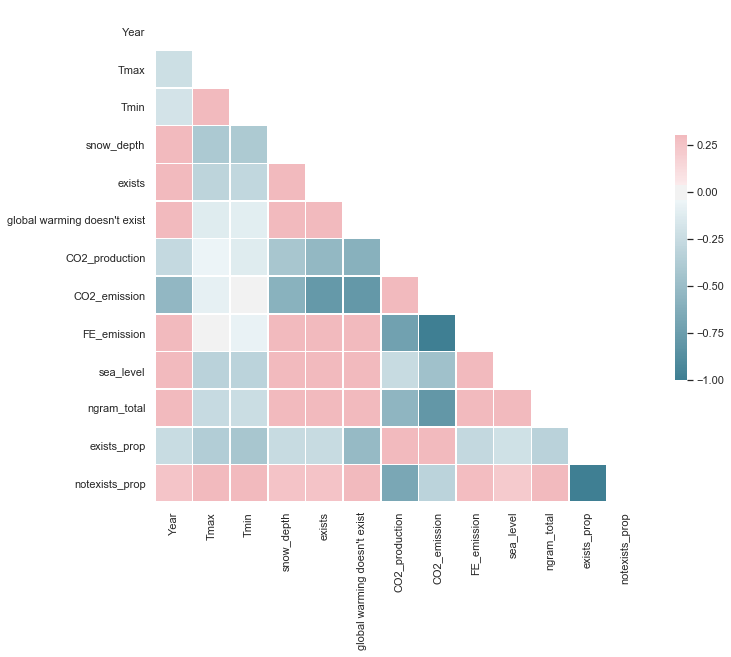

In [26]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation between factors and ngram data:
- the proportion of printed sources indicate global warming exists:
    - positive correlation: Tmax, Tmin, snow_depth, real-world fuel economy emission, cumulative sea level
    - negative correlation: real-world CO2 emission
- the proportion of printe sources indicate global does not exist:
    - positive correlation: real-world CO2 emission
    - negative correlation: Tmax, Tmin, snow_depth, real-world fuel economy emission, cumulative sea level


**Note that the correlations are not strong, it's very light correlations.**

In [27]:
df.columns

Index(['Year', 'Tmax', 'Tmin', 'snow_depth', 'exists',
       'global warming doesn't exist', 'CO2_production', 'CO2_emission',
       'FE_emission', 'sea_level', 'ngram_total', 'exists_prop',
       'notexists_prop'],
      dtype='object')

# Linear Regression

In [28]:
mod1 = smf.ols(formula='exists_prop ~ Tmax+Tmin+snow_depth+CO2_production+CO2_emission+FE_emission+sea_level',
              data = df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:            exists_prop   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2.403
Date:                Tue, 07 May 2019   Prob (F-statistic):              0.253
Time:                        16:03:37   Log-Likelihood:                 20.155
No. Observations:                  11   AIC:                            -24.31
Df Residuals:                       3   BIC:                            -21.13
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -63.6109     57.261     -1.

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [29]:
df2 = df[["exists_prop","Tmax","Tmin","snow_depth","CO2_production","CO2_emission","FE_emission","sea_level"]]
corr = df2.corr()

## Multicollinearity problem

In [30]:
corr

,exists_prop,Tmax,Tmin,snow_depth,CO2_production,CO2_emission,FE_emission,sea_level
exists_prop,1.000000,-0.360882,-0.429506,-0.249388,0.679641,0.319080,-0.282825,-0.209815
Tmax,-0.360882,1.000000,0.718007,-0.403079,-0.052919,-0.084461,0.028861,-0.323695
Tmin,-0.429506,0.718007,1.000000,-0.392742,-0.116453,0.019006,-0.066994,-0.317709
snow_depth,-0.249388,-0.403079,-0.392742,1.000000,-0.426980,-0.589003,0.612881,0.939277
CO2_production,0.679641,-0.052919,-0.116453,-0.426980,1.000000,0.726150,-0.718000,-0.249753
CO2_emission,0.319080,-0.084461,0.019006,-0.589003,0.726150,1.000000,-0.997715,-0.463123
FE_emission,-0.282825,0.028861,-0.066994,0.612881,-0.718000,-0.997715,1.000000,0.485395
sea_level,-0.209815,-0.323695,-0.317709,0.939277,-0.249753,-0.463123,0.485395,1.000000


In [31]:
mod2 = smf.ols(formula='exists_prop ~ Tmax+snow_depth+CO2_production+sea_level',
              data = df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:            exists_prop   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     2.322
Date:                Tue, 07 May 2019   Prob (F-statistic):              0.171
Time:                        16:03:37   Log-Likelihood:                 14.915
No. Observations:                  11   AIC:                            -19.83
Df Residuals:                       6   BIC:                            -17.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9328      3.058      0.

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [32]:
mod3 = smf.ols(formula='exists_prop ~ CO2_production',
              data = df).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:            exists_prop   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     7.726
Date:                Tue, 07 May 2019   Prob (F-statistic):             0.0214
Time:                        16:03:37   Log-Likelihood:                 13.179
No. Observations:                  11   AIC:                            -22.36
Df Residuals:                       9   BIC:                            -21.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6595      0.523     -1.

/anaconda3/envs/myEnv3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


# Line graphs

Text(0.5, 1.0, 'Average global maximum temperature per year vs. Proportion of people believes global warming exits or not')

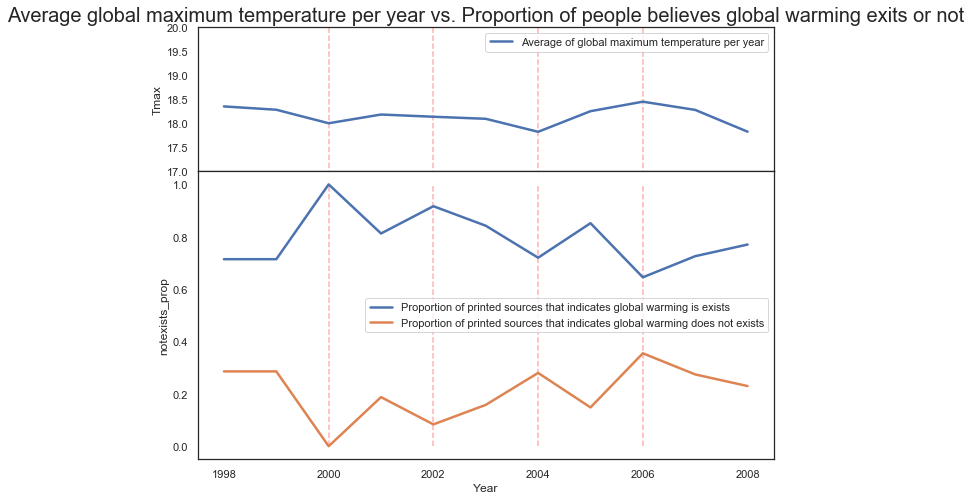

In [33]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.2],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "Tmax", data = df, palette="tab10", linewidth=2.5, 
                  label = "Average of global maximum temperature per year",ax = ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming is exists",ax = ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming does not exists", ax = ax2)
ax1.set_ylim(17,20)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 20)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 20)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 20)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 20)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("Average global maximum temperature per year vs. Proportion of people believes global warming exits or not",
             fontsize=20)

**No notable relation between average maximum temperatures per year and ngram features**

Text(0.5, 1.0, 'Average global minimum temperature per year vs. Proportion of people believes global warming exits or not')

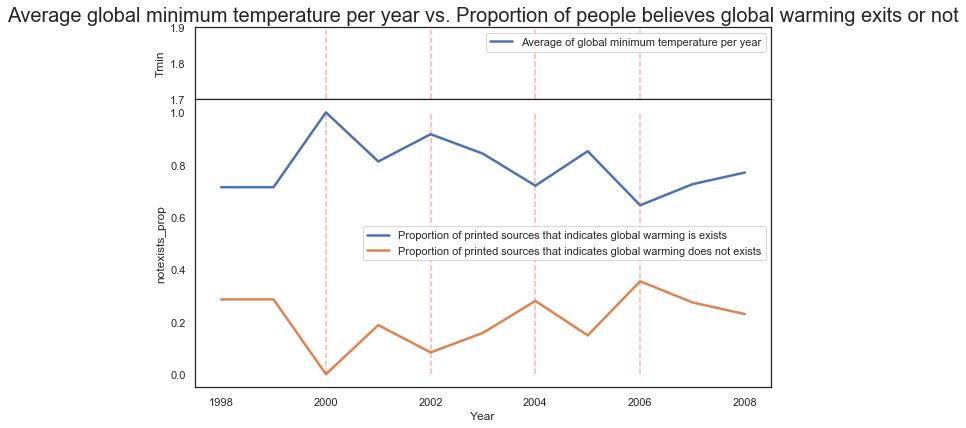

In [34]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.1],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "Tmin", data = df, palette="tab10", linewidth=2.5, 
                  label = "Average of global minimum temperature per year", ax=ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming is exists", ax=ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming does not exists", ax=ax2)
ax1.set_ylim(1.7,1.9)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 2)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 2)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 2)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 2)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("Average global minimum temperature per year vs. Proportion of people believes global warming exits or not",
             fontsize=20)

**No notable relation between average minimum temperatures per year and ngram features**

Text(0.5, 1.0, 'Average global snow depth (mm) vs. Proportion of people believes global warming exits or not')

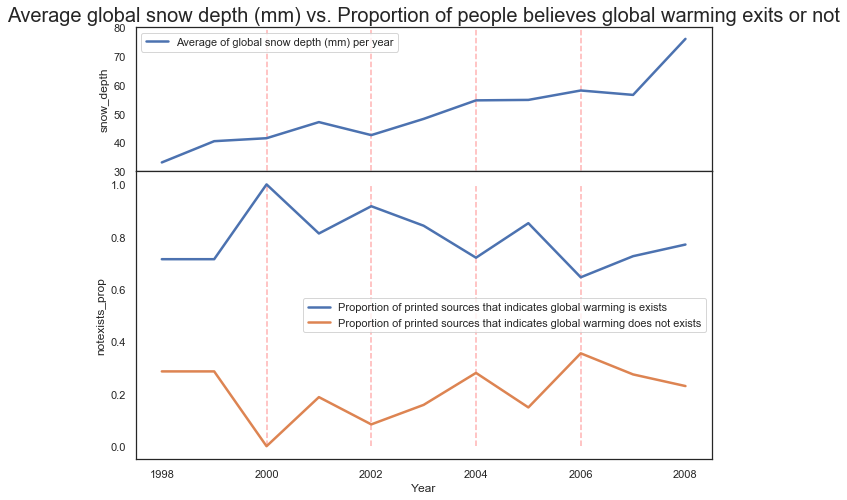

In [35]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.2],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "snow_depth", data = df, palette="tab10", linewidth=2.5, 
                  label = "Average of global snow depth (mm) per year", ax=ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming is exists", ax=ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming does not exists", ax=ax2)
ax1.set_ylim(30,80)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 80)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 80)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 80)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 80)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("Average global snow depth (mm) vs. Proportion of people believes global warming exits or not",
             fontsize=20)

**No notable relation between average snow depth per year and ngram features**

Text(0.5, 1.0, 'Global Co2 Production per year vs. Proportion of people believes global warming exits or not')

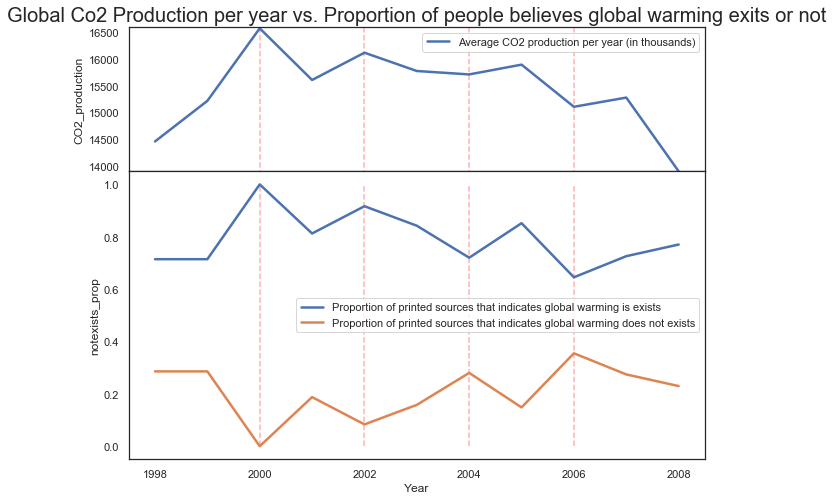

In [37]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.2],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "CO2_production", data = df, palette="tab10", linewidth=2.5, 
                  label = "Average CO2 production per year (in thousands)", ax=ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming is exists", ax=ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming does not exists", ax=ax2)
ax1.set_ylim(13898,16590)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 16590)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 16590)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 16590)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 16590)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("Global Co2 Production per year vs. Proportion of people believes global warming exits or not",
             fontsize=20)

## As the proportion of CO2 produced each year has the same trend as the Proportion of printed sources that indicate global warming exits

Text(0.5, 1.0, 'Global CO2 emission per year vs. Proportion of people believes global warming exits or not')

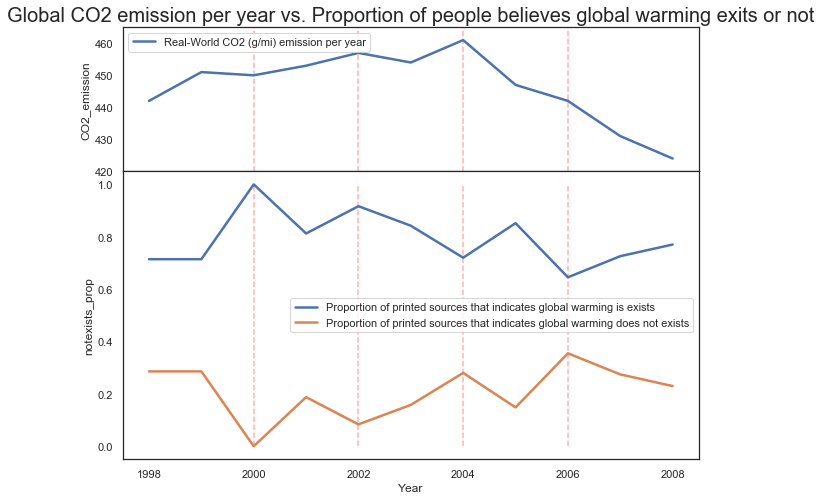

In [39]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.2],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "CO2_emission", data = df, palette="tab10", linewidth=2.5, 
                  label = "Real-World CO2 (g/mi) emission per year", ax=ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming is exists", ax=ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of printed sources that indicates global warming does not exists", ax=ax2)
ax1.set_ylim(420,465)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 470)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 470)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 470)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 470)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("Global CO2 emission per year vs. Proportion of people believes global warming exits or not",
             fontsize=20)

## The trend of global CO2 emission per year has lag effect on ngram data. For example, when the CO2 emission increases in year n, proportion of printed sources that indicates global warming is exists increases in year n+1, proportion of printed sources that indicates global warming do not exist decreases in year n+1

Text(0.5, 1.0, 'Global Fuel Economy Emission per year vs. Proportion of people believes global warming exits or not')

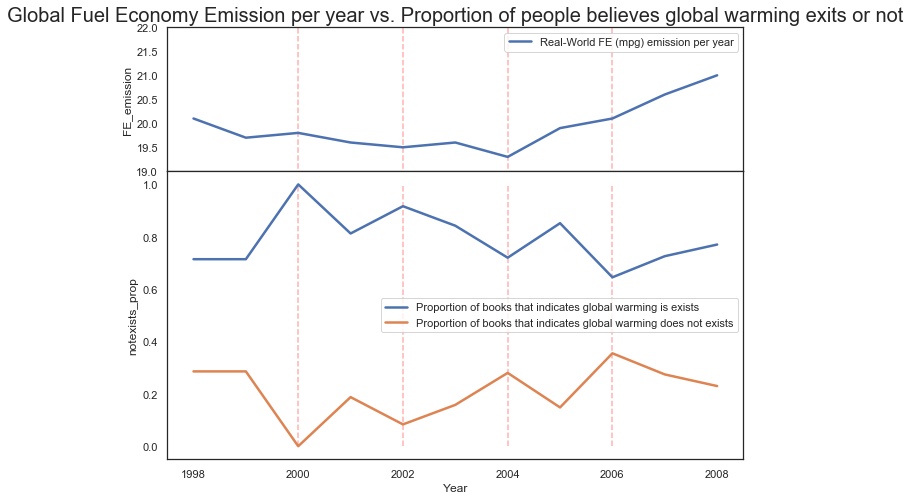

In [40]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.2],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "FE_emission", data = df, palette="tab10", linewidth=2.5, 
                  label = "Real-World FE (mpg) emission per year", ax=ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of books that indicates global warming is exists", ax=ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of books that indicates global warming does not exists", ax=ax2)
ax1.set_ylim(19,22)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 22)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 22)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 22)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 22)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("Global Fuel Economy Emission per year vs. Proportion of people believes global warming exits or not",
             fontsize=20)

**No notable relation between fuel economy emission per year and ngram features**

Text(0.5, 1.0, 'CSIRO adjusted sea level per year vs. Proportion of people believes global warming exits or not')

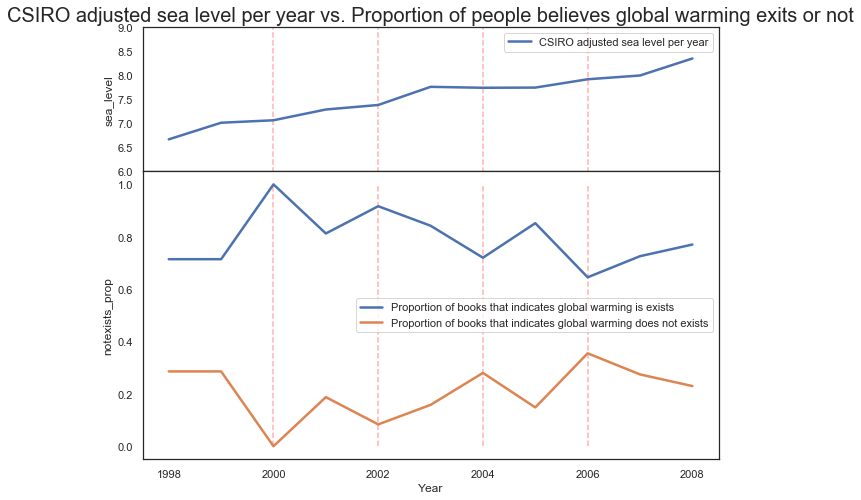

In [41]:
fig = plt.figure(figsize(10,10))
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.2],xticklabels = [])
ax2 = fig.add_axes([0.1,0.1, 0.8, 0.4])

sns.lineplot(x="Year",y = "sea_level", data = df, palette="tab10", linewidth=2.5, 
                  label = "CSIRO adjusted sea level per year", ax=ax1)
sns.lineplot(x="Year",y = "exists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of books that indicates global warming is exists", ax=ax2)
sns.lineplot(x="Year",y = "notexists_prop", data = df, palette="tab10", linewidth=2.5,
                 label = "Proportion of books that indicates global warming does not exists", ax=ax2)
ax1.set_ylim(6,9)
ax1.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 9)
ax1.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 9)
ax1.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 9)
ax1.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = 9)
ax2.vlines(x=2000, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2002, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2004, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax2.vlines(x=2006, color="red", alpha=0.3, linestyle = "--",ymin = 0, ymax = df["exists_prop"].max())
ax1.set_title("CSIRO adjusted sea level per year vs. Proportion of people believes global warming exits or not",
             fontsize=20)

**No notable relation between cumulative sea level per year and ngram features**

## Twitter Sentiment Analysis

In [42]:
earthday.drop(columns = {"Unnamed: 0"}, axis=1, inplace=True)

In [43]:
earthday.shape

(14280, 2)

In [44]:
dummies = pd.get_dummies(earthday.sentiment)

In [45]:
dummies = pd.concat([earthday.Time, dummies], axis=1)

In [46]:
dummies["Hour"],dummies["Minutes"], dummies["Seconds"] = dummies["Time"].str.split(":").str

In [47]:
dummies[dummies["Y"] == 1].count()

Time       10895
N          10895
Y          10895
Hour       10895
Minutes    10895
Seconds    10895
dtype: int64

In [48]:
d = dummies[dummies["Hour"] == "00"]
d[d.Y == 1].count()

Time       278
N          278
Y          278
Hour       278
Minutes    278
Seconds    278
dtype: int64

In [49]:
N = dummies.groupby(["Hour"])["N"].sum()
Y = dummies.groupby(["Hour"])["Y"].sum()

In [50]:
earth = pd.concat([N,Y],axis=1)

In [51]:
earth.reset_index(inplace=True)

In [52]:
earth.sum()

Hour    1.020304e+44
N       3.385000e+03
Y       1.089500e+04
dtype: float64

In [53]:
p = (earth.Y.sum() - earth.N.sum())/(earth.Y.sum() + earth.N.sum())*100

In [54]:
print("The number of tweets believe global warming is exists on earth day is %f"%p +
      "% larger than the number tweets that does not believe global warming is exists on earth day.")

The number of tweets believe global warming is exists on earth day is 52.591036% larger than the number tweets that does not believe global warming is exists on earth day.


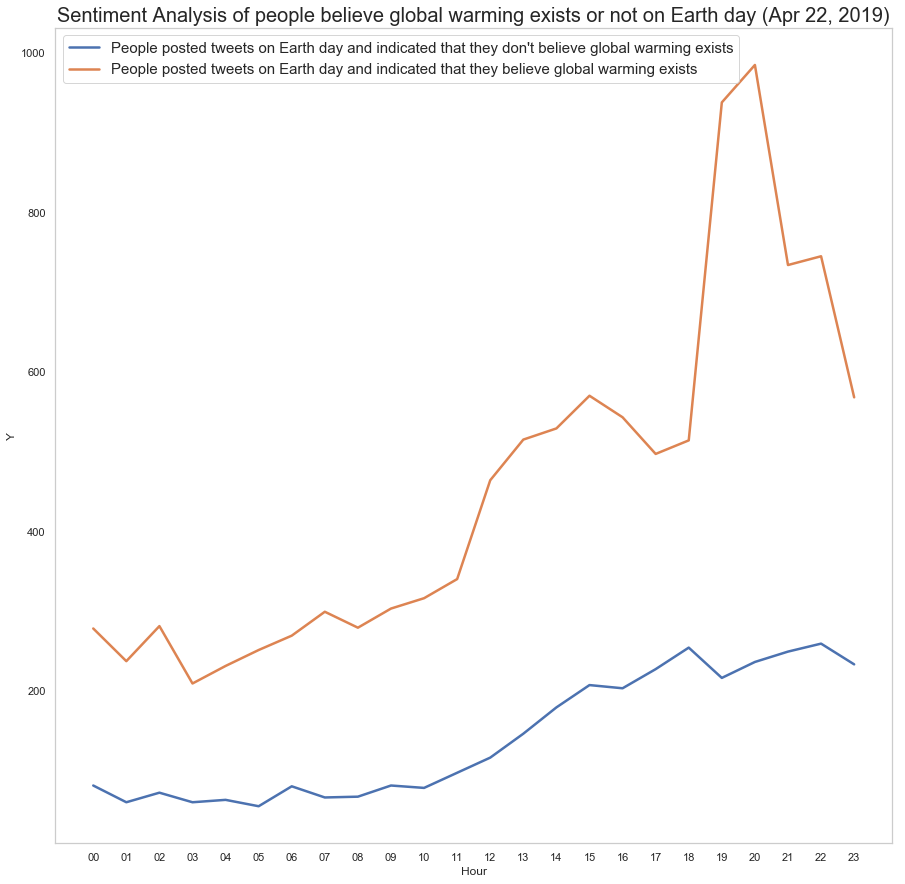

In [60]:
fig = plt.figure(figsize(15,15))
ax = fig.add_subplot(111)
sns.set(style="whitegrid")
sns.lineplot(x="Hour",y = "N", data = earth, palette="tab10", linewidth=2.5, 
                  label = "People posted tweets on Earth day and indicated that they don't believe global warming exists")
sns.lineplot(x="Hour",y = "Y", data = earth, palette="tab10", linewidth=2.5, 
                  label = "People posted tweets on Earth day and indicated that they believe global warming exists")
plt.legend(loc='upper left', fontsize = 15)
ax.set_title("Sentiment Analysis of people believe global warming exists or not on Earth day (Apr 22, 2019)",
             fontsize=20)
plt.grid()

**People posted tweets that indicate they believe global warming exists and not exists on earth day are flutuated between 0 a.m. and 3 a.m. After 3 a.m. Both features are rapidly increasing, but most of the people believes that global warming is happening. Number of tweets that believe global warming is exists reached its maximum at 8 p.m, and keep decreasing thereafter.**

In [56]:
earthday = pd.get_dummies(earthday, columns = ['sentiment'])

In [57]:
earthday

,Time,sentiment_N,sentiment_Y
0,23:59:58,0,1
1,23:59:46,0,1
2,23:59:46,1,0
3,23:59:43,0,1
4,23:59:41,0,1
5,23:59:39,0,1
6,23:59:26,0,1
7,23:59:18,0,1
8,23:59:16,0,1
9,23:59:09,0,1


In [58]:
earthday = pd.read_csv("twitter_earthday.csv")

Text(0, 0.5, 'Number of Tweets')

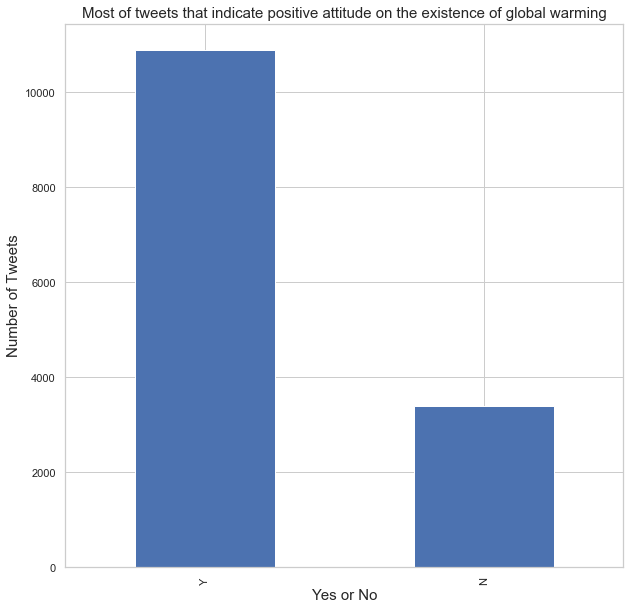

In [59]:
plt.figure(figsize=(10,10))
earthday['sentiment'].value_counts().plot('bar')
plt.title("Most of tweets that indicate positive attitude on the existence of global warming", fontsize=15)
plt.xlabel("Yes or No", fontsize=15)
plt.ylabel("Number of Tweets", fontsize=15)

#### 